# Earthquake Odyssey: Navigating the Historical Landscape of Seismic Events (Significant Earthquake Dataset 1900-2023)
I have a profound interest in the field of disaster management, which is why I chose to study Disaster Management during my first and second semesters as a part of the Choice-Based Credit System (CBCS) curriculum. Additionally, I am an avid data science enthusiast, and this passion led me to embark on an exploratory data analysis project focused on global earthquake data.

In the pursuit of this project, I harnessed substantial datasets and employed various analytical techniques. The core dataset for my analysis was sourced from the USGS Earthquake Database(https://www.kaggle.com/datasets/jahaidulislam/significant-earthquake-dataset-1900-2023/data. By applying the skills I've acquired, particularly in the areas of CSV file manipulation, and utilizing libraries such as Basemap, Pandas, Numpy, Matplotlib, and fundamental statistical methods, I aspired to uncover valuable insights about earthquakes.

Each section of my analysis is structured around a specific question, highlighted in bold, that aims to shed light on various aspects of earthquake occurrences and characteristics." 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Let's look at our dataset!

The dataset is a csv file that has been downloaded from the USGS Earthquake Database (shown above). This dataset represents significant earthquakes that have occured throughout the world from the years 1900 to 2023. A significant earthquake is one that has been determined by the USGS to meet the three following criteria:

1. Magnitude Significance: This considers how powerful the earthquake is based on its magnitude. Magnitude is a measure of the energy released during an earthquake. We calculate a significance score by multiplying the magnitude by 100 and then dividing it by 6.5. The higher the magnitude, the higher the significance score.

2. PAGER Significance: PAGER is a system used by the USGS to assess the potential impact of earthquakes. Depending on the severity of the earthquake, it's categorized as red (most severe), orange, or yellow. We assign significance scores based on these categories: 2000 for red, 1000 for orange, 500 for yellow, and 0 for anything else.

3. DYFI Significance: DYFI stands for "Did You Feel It?" It's a way for people to report if they felt an earthquake and how strong it was in their area. The number of responses and the perceived strength (called CDI) are used to calculate the significance. We take the minimum of the number of responses and 1000, multiply it by the maximum CDI, and divide by 10.

significance = max(mag_significance, pager_significance) + dyfi_significance

Any event with a significance > 600 is considered a significant event and appears on the list.

In [2]:
df = pd.read_csv('Significant Earthquake Dataset 1900-2023.csv')
df

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,...,Updated,Unnamed: 14,Type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-17T09:37:34.868Z,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.10,mww,119.0,51.0,2.988,...,2023-02-17T17:58:24.040Z,NaN,earthquake,6.41,5.595,0.065,23.0,reviewed,us,us
1,2023-02-16T05:37:05.138Z,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.60,mww,81.0,26.0,0.392,...,2023-02-17T05:41:32.448Z,NaN,earthquake,5.99,6.080,0.073,18.0,reviewed,us,us
2,2023-02-15T18:10:10.060Z,"Masbate region, Philippines",12.3238,123.8662,20.088,6.10,mww,148.0,47.0,5.487,...,2023-02-16T20:12:32.595Z,NaN,earthquake,8.61,4.399,0.037,71.0,reviewed,us,us
3,2023-02-15T06:38:09.034Z,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.70,mww,81.0,40.0,0.768,...,2023-02-16T06:42:09.738Z,NaN,earthquake,3.68,4.922,0.065,23.0,reviewed,us,us
4,2023-02-14T13:16:51.072Z,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.60,mww,132.0,28.0,1.197,...,2023-02-17T09:15:18.586Z,NaN,earthquake,4.85,1.794,0.032,95.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37326,1902-01-01T05:20:30.000Z,"113 km ESE of Nikolski, Alaska",52.3800,-167.4500,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,NaN,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
37327,1901-12-31T09:02:30.000Z,"221 km SW of Nikolski, Alaska",51.4500,-171.0200,NaN,7.10,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,NaN,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
37328,1901-12-30T22:34:00.000Z,south of Alaska,52.0000,-160.0000,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,NaN,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
37329,1901-03-03T07:45:00.000Z,"12 km NNW of Parkfield, California",36.0000,-120.5000,NaN,6.40,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,NaN,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell


In [3]:
df.shape

(37331, 23)

In [4]:
df.dtypes

Time                object
Place               object
Latitude           float64
Longitude          float64
Depth              float64
Mag                float64
MagType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
ID                  object
Updated             object
Unnamed: 14        float64
Type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [5]:
df.info

<bound method DataFrame.info of                            Time                               Place  Latitude  \
0      2023-02-17T09:37:34.868Z        130 km SW of Tual, Indonesia   -6.5986   
1      2023-02-16T05:37:05.138Z       7 km SW of Port-Olry, Vanuatu  -15.0912   
2      2023-02-15T18:10:10.060Z         Masbate region, Philippines   12.3238   
3      2023-02-15T06:38:09.034Z     54 km WNW of Otaki, New Zealand  -40.5465   
4      2023-02-14T13:16:51.072Z         2 km NW of Lele?ti, Romania   45.1126   
...                         ...                                 ...       ...   
37326  1902-01-01T05:20:30.000Z      113 km ESE of Nikolski, Alaska   52.3800   
37327  1901-12-31T09:02:30.000Z       221 km SW of Nikolski, Alaska   51.4500   
37328  1901-12-30T22:34:00.000Z                     south of Alaska   52.0000   
37329  1901-03-03T07:45:00.000Z  12 km NNW of Parkfield, California   36.0000   
37330  1900-10-09T12:25:00.000Z      16 km SW of Old Harbor, Alaska   57.0900

This is certainly a large dataset! The file has records of over 37000 earthquakes (37000+ rows), the majority of whose magnitude is over 5.5 (precise statistics will be discussed later). It also has 19 features, such as latitude and longitude, the magnitude, depth and other features like Type, horizontal Error, depth Error, mag Error.r!

In [6]:
df.isnull().sum() * 100 / len(df) 

Time                 0.000000
Place                0.760762
Latitude             0.000000
Longitude            0.000000
Depth                0.358951
Mag                  0.000000
MagType              0.000000
nst                 79.981785
gap                 72.979561
dmin                88.226943
rms                 45.841258
net                  0.000000
ID                   0.000000
Updated              0.000000
Unnamed: 14        100.000000
Type                 0.000000
horizontalError     89.365407
depthError          44.209906
magError            55.664193
magNst              85.609815
status               0.000000
locationSource       0.000000
magSource            0.000000
dtype: float64

We don't need some features for our analysis, so let's include only the time, Place, the latitude and longitude, Magnitude, Type, status and the depth of the earthquake source to make our analysis simpler!

In [7]:
columns_to_drop = ['nst', 'gap', 'dmin', 'horizontalError', 'Unnamed: 14', 
                   'magNst', 'MagType', 'net', 'rms', 'ID', 'Updated', 
                   'depthError', 'magError', 'locationSource', 'magSource']

# Dropping the specified columns
df = df.drop(columns=columns_to_drop)
df

,Time,Place,Latitude,Longitude,Depth,Mag,Type,status
0,2023-02-17T09:37:34.868Z,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.10,earthquake,reviewed
1,2023-02-16T05:37:05.138Z,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.60,earthquake,reviewed
2,2023-02-15T18:10:10.060Z,"Masbate region, Philippines",12.3238,123.8662,20.088,6.10,earthquake,reviewed
3,2023-02-15T06:38:09.034Z,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.70,earthquake,reviewed
4,2023-02-14T13:16:51.072Z,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.60,earthquake,reviewed
...,...,...,...,...,...,...,...,...
37326,1902-01-01T05:20:30.000Z,"113 km ESE of Nikolski, Alaska",52.3800,-167.4500,NaN,7.00,earthquake,reviewed
37327,1901-12-31T09:02:30.000Z,"221 km SW of Nikolski, Alaska",51.4500,-171.0200,NaN,7.10,earthquake,reviewed
37328,1901-12-30T22:34:00.000Z,south of Alaska,52.0000,-160.0000,NaN,7.00,earthquake,reviewed
37329,1901-03-03T07:45:00.000Z,"12 km NNW of Parkfield, California",36.0000,-120.5000,NaN,6.40,earthquake,reviewed


In [8]:
df['Time'] = pd.to_datetime(df['Time'])

# Add separate columns for date and time
df['Date'] = df['Time'].dt.date
df['Time'] = df['Time'].dt.time

In [9]:
df

,Time,Place,Latitude,Longitude,Depth,Mag,Type,status,Date
0,09:37:34.868000,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.10,earthquake,reviewed,2023-02-17
1,05:37:05.138000,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.60,earthquake,reviewed,2023-02-16
2,18:10:10.060000,"Masbate region, Philippines",12.3238,123.8662,20.088,6.10,earthquake,reviewed,2023-02-15
3,06:38:09.034000,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.70,earthquake,reviewed,2023-02-15
4,13:16:51.072000,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.60,earthquake,reviewed,2023-02-14
...,...,...,...,...,...,...,...,...,...
37326,05:20:30,"113 km ESE of Nikolski, Alaska",52.3800,-167.4500,NaN,7.00,earthquake,reviewed,1902-01-01
37327,09:02:30,"221 km SW of Nikolski, Alaska",51.4500,-171.0200,NaN,7.10,earthquake,reviewed,1901-12-31
37328,22:34:00,south of Alaska,52.0000,-160.0000,NaN,7.00,earthquake,reviewed,1901-12-30
37329,07:45:00,"12 km NNW of Parkfield, California",36.0000,-120.5000,NaN,6.40,earthquake,reviewed,1901-03-03


In [10]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the total number of duplicates
total_duplicates = duplicate_rows.sum()

# Print the total number of duplicates
print("Total duplicates:", total_duplicates)

Total duplicates: 0


In [11]:
df.isnull().sum() * 100 / len(df) 

Time         0.000000
Place        0.760762
Latitude     0.000000
Longitude    0.000000
Depth        0.358951
Mag          0.000000
Type         0.000000
status       0.000000
Date         0.000000
dtype: float64

In [12]:
# Fill null values with the mean and mode of the column
df['Depth'] = df['Depth'].fillna(df['Depth'].mean())
df['Place'].fillna(df['Place'].mode()[0])

0              130 km SW of Tual, Indonesia
1             7 km SW of Port-Olry, Vanuatu
2               Masbate region, Philippines
3           54 km WNW of Otaki, New Zealand
4               2 km NW of Lele?ti, Romania
                        ...                
37326        113 km ESE of Nikolski, Alaska
37327         221 km SW of Nikolski, Alaska
37328                       south of Alaska
37329    12 km NNW of Parkfield, California
37330        16 km SW of Old Harbor, Alaska
Name: Place, Length: 37331, dtype: object

In [13]:
df.isnull().sum() * 100 / len(df) 

Time         0.000000
Place        0.760762
Latitude     0.000000
Longitude    0.000000
Depth        0.000000
Mag          0.000000
Type         0.000000
status       0.000000
Date         0.000000
dtype: float64

In [14]:
 df.nunique()

Time         37239
Place        25800
Latitude     31722
Longitude    33478
Depth         4169
Mag            264
Type             4
status           2
Date         21649
dtype: int64

In [15]:
df.describe()

,Latitude,Longitude,Depth,Mag
count,37331.000000,37331.000000,37331.000000,37331.000000
mean,5.457651,38.877695,58.583346,5.948616
std,30.789822,123.090934,109.366578,0.455160
min,-77.080000,-179.997000,-4.000000,5.500000
25%,-16.519800,-75.807000,15.000000,5.600000
50%,1.153000,98.577000,28.800000,5.800000
75%,33.786000,143.347850,41.900000,6.140000
max,87.199000,180.000000,700.000000,9.500000


## What is a rough geographical distribution of our earthquake list? Are some areas more "cluttered" or concentrated than others?

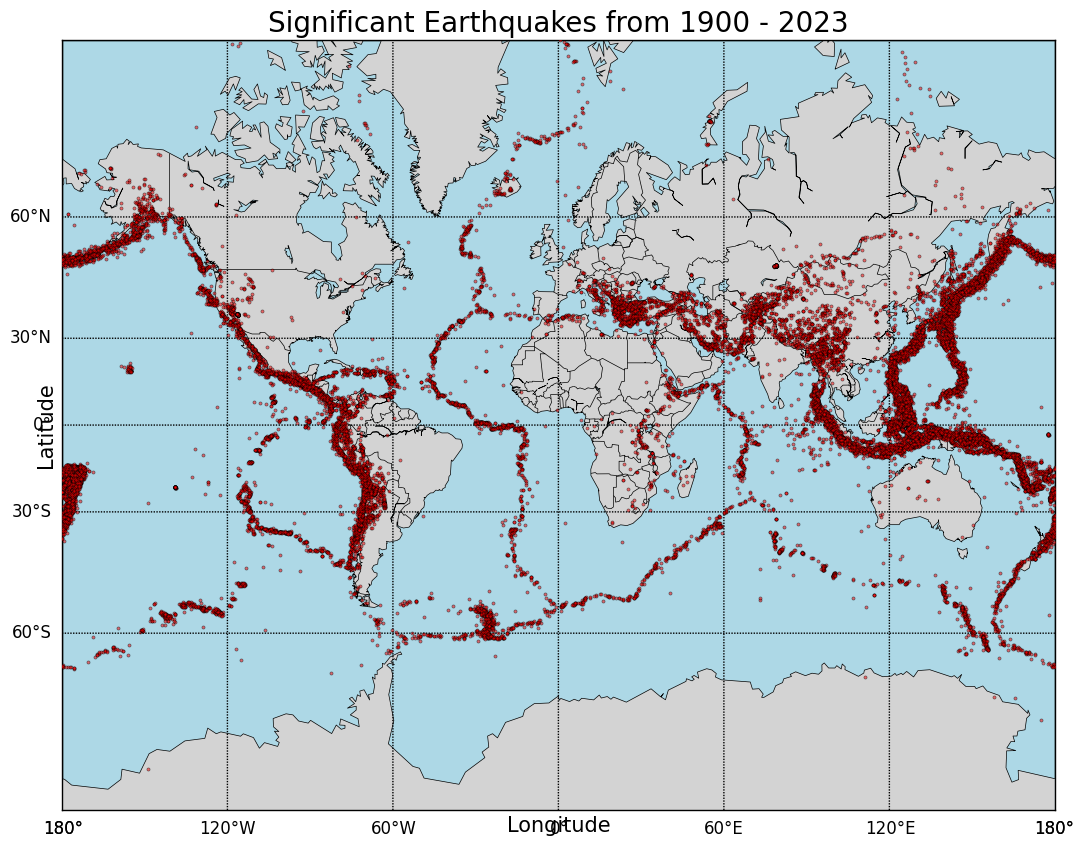

In [16]:
from mpl_toolkits.basemap import Basemap

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Convert coordinates to map projection
x, y = m(df["Longitude"].values, df["Latitude"].values)

# Create the figure
fig = plt.figure(figsize=(14, 10))

# Plot earthquake locations
m.scatter(x, y, s=5, c='red', marker='o', alpha=0.5, edgecolor='black', linewidth=0.5, zorder=3)

# Add title and labels
plt.title("Significant Earthquakes from 1900 - 2023", fontsize=20)
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)

# Draw coastlines, map boundary, countries, and fill continents
m.drawcoastlines(linewidth=0.5)
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='lightblue', zorder=1)

# Add gridlines
m.drawparallels(range(-90, 91, 30), labels=[1, 0, 0, 0], fontsize=12)
m.drawmeridians(range(-180, 181, 60), labels=[0, 0, 0, 1], fontsize=12)

# Show the plot
plt.show()

It appears that the majority of earthquakes are concentrated in the Indonesian, Sino-Pacific, and Japanese regions. What is the reason behind this pattern? Before delving into the magnitude of earthquakes and its correlation with their geographical distribution, let's address this query. According to National Geographic, the Pacific Ring of Fire, also known as the Circum-Pacific belt, is identified by the U.S. Geological Survey (USGS) as the world's most prominent earthquake zone. This designation is due to its extensive network of fault lines spanning 25,000 miles (40,000 kilometers) from Chile in the Western Hemisphere through Japan and Southeast Asia. The magazine reports that approximately 90 percent of all global earthquakes, and 80 percent of the most significant earthquakes, occur along the Ring of Fire. Around 17 percent of the largest earthquakes worldwide and 5-6 percent of all earthquakes are observed along the Alpide belt.

Now, are these statistics accurate? Let's investigate further.

In [17]:
rof_lat = [-61.270, 56.632]
rof_long = [-70, 120]

I have the defined the Ring of Fire matrix to be the area of the world whose latitude is below 59.389 and above -45.783 and whose longitude is greater than -229.219 and below -65.391 degrees, (converted to about -70 to 120 on the Mercator projection). These values are obtained by drawing a rectangle that circumscribed the Ring of Fire area on the USGS interactive map.

In [18]:
ringoffire = df[((df.Latitude < rof_lat[1]) & 
                    (df.Latitude > rof_lat[0]) & 
                     ~((df.Longitude < rof_long[1]) & 
                       (df.Longitude > rof_long[0])))]

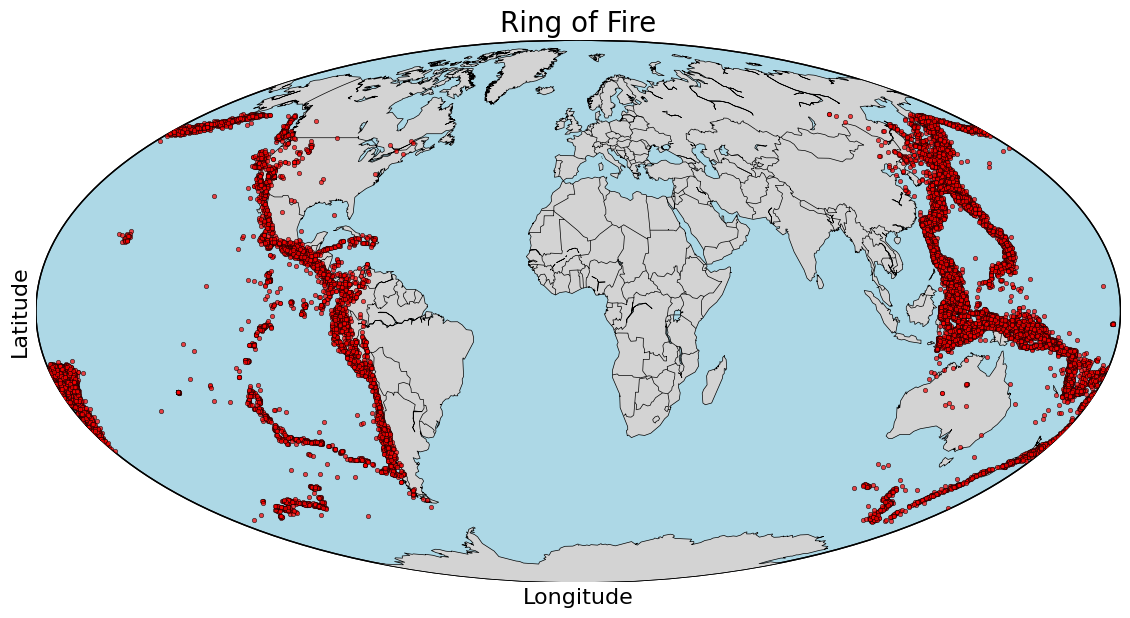

In [19]:
# Create a Basemap instance
m = Basemap(projection='moll', lon_0=0, resolution='c')

# Convert coordinates to map projection
x, y = m(ringoffire["Longitude"].values, ringoffire["Latitude"].values)

# Create the figure
fig = plt.figure(figsize=(14, 10))

# Plot earthquake locations in the Ring of Fire area
m.scatter(x, y, s=10, c='red', marker='o', alpha=0.7, edgecolor='black', linewidth=0.5, zorder=3)

# Add title and labels
plt.title("Ring of Fire", fontsize=20)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

# Draw coastlines, map boundary, countries, and fill continents
m.drawcoastlines(linewidth=0.5)
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='lightblue', zorder=1)

# Show the plot
plt.show()

In [20]:
ringoffire

,Time,Place,Latitude,Longitude,Depth,Mag,Type,status,Date
0,09:37:34.868000,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615000,6.1,earthquake,reviewed,2023-02-17
1,05:37:05.138000,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029000,5.6,earthquake,reviewed,2023-02-16
2,18:10:10.060000,"Masbate region, Philippines",12.3238,123.8662,20.088000,6.1,earthquake,reviewed,2023-02-15
3,06:38:09.034000,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320000,5.7,earthquake,reviewed,2023-02-15
5,09:18:07.995000,"Kermadec Islands, New Zealand",-29.5218,-177.9727,374.033000,6.1,earthquake,reviewed,2023-02-13
...,...,...,...,...,...,...,...,...,...
37325,19:50:00,"Near Pine Valley, Utah",37.4000,-113.5000,58.583346,6.3,earthquake,reviewed,1902-11-17
37326,05:20:30,"113 km ESE of Nikolski, Alaska",52.3800,-167.4500,58.583346,7.0,earthquake,reviewed,1902-01-01
37327,09:02:30,"221 km SW of Nikolski, Alaska",51.4500,-171.0200,58.583346,7.1,earthquake,reviewed,1901-12-31
37328,22:34:00,south of Alaska,52.0000,-160.0000,58.583346,7.0,earthquake,reviewed,1901-12-30


There are 27106 earthquakes which are positioned solely in the ring of fire area. There were 37329 total large earthquakes in the entire dataset. So, frequency wise, about 72.6% of significant or largest earthquakes are in the Ring of Fire region. This is extremely close to the 80% figure cited in the National Geographic.

## Magnitude Statistics

### What are some basic statistics (max, min, average etc) for the magnitudes of the entire dataset and the Ring of Fire earthquake subset?
### Which magnitudes occur the most frequently in both datasets?
### Is there some sort of pattern in the frequency of magnitudes?

  Range of Magnitude  Frequency  Percentage
0            5.5-5.9    14259.0     52.6046
1            5.9-6.3     7453.0     27.4958
2            6.3-6.7     3173.0     11.7059
3            6.7-7.1     1324.0      4.8845
4            7.1-7.5      534.0      1.9700
5            7.5-7.9      258.0      0.9518
6            7.9-8.3       84.0      0.3099
7            8.3-8.7       15.0      0.0553
8            8.7-9.1        4.0      0.0148
9            9.1-9.5        2.0      0.0074


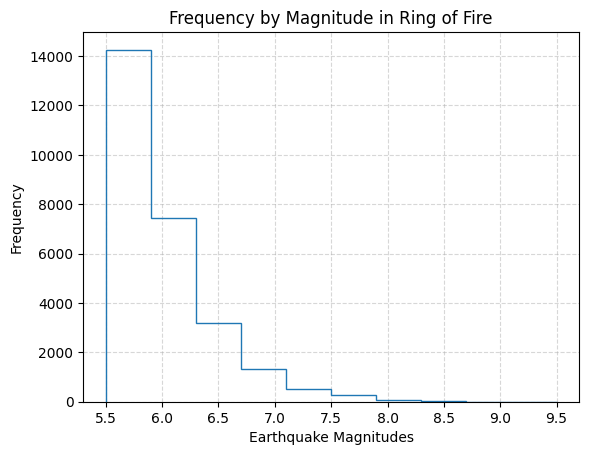

In [21]:
# Plot histogram of earthquake magnitudes
n, bins, _ = plt.hist(ringoffire["Mag"], histtype='step', range=(5.5, 9.5), bins=10)
plt.xlabel("Earthquake Magnitudes")
plt.ylabel("Frequency")
plt.title("Frequency by Magnitude in Ring of Fire")

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Calculate frequency and percentage for each magnitude bin
total = len(ringoffire)  # Total number of earthquakes
histo = pd.DataFrame(columns=['Range of Magnitude', 'Frequency', 'Percentage'])
for i in range(len(n)):
    mag = f"{bins[i]:.1f}-{bins[i+1]:.1f}"
    freq = n[i]
    percentage = round((n[i] / total) * 100, 4)
    histo.loc[i] = [mag, freq, percentage]

print(histo)

In [22]:
minimum = ringoffire["Mag"].min()
maximum = ringoffire["Mag"].max()
average = ringoffire["Mag"].mean()

print("Minimum:", minimum)
print("Maximum:",maximum)
print("Mean",average)

Minimum: 5.5
Maximum: 9.5
Mean 5.961601490444919


In [23]:
minimum = df["Mag"].min()
maximum = df["Mag"].max()
average = df["Mag"].mean()

print("Minimum:", minimum)
print("Maximum:",maximum)
print("Mean",average)

Minimum: 5.5
Maximum: 9.5
Mean 5.948615895636335


The minimum, maximum and average for both datasets are eerily close together! What does that mean? For one thing, the subset data (the Ring of Fire earthquakes) comprise almost 72.6% of the total data; this ensures that statistics for both datasets will be extremely similar. Secondly, and more importantly, the dataset contains only earthquakes that have more than 5.5 magnitude (significant ones). If the dataset included a list of all earthquakes, we would see that a concentration of the world's major earthquakes would be in the Ring of Fire area. We will do so later.

  Range of Magnitude  Frequency  Percentage
0            5.5-5.9    20238.0     54.2123
1            5.9-6.3     9992.0     26.7660
2            6.3-6.7     4186.0     11.2132
3            6.7-7.1     1754.0      4.6985
4            7.1-7.5      686.0      1.8376
5            7.5-7.9      335.0      0.8974
6            7.9-8.3      110.0      0.2947
7            8.3-8.7       22.0      0.0589
8            8.7-9.1        4.0      0.0107
9            9.1-9.5        4.0      0.0107


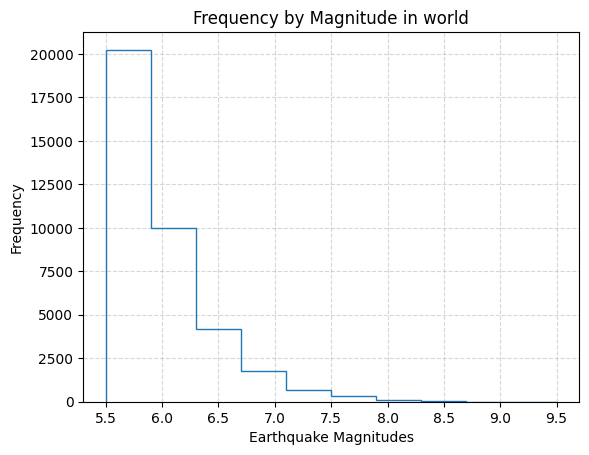

In [24]:
# Plot histogram of earthquake magnitudes
n, bins, _ = plt.hist(df["Mag"], histtype='step', range=(5.5, 9.5), bins=10)
plt.xlabel("Earthquake Magnitudes")
plt.ylabel("Frequency")
plt.title("Frequency by Magnitude in world")

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Calculate frequency and percentage for each magnitude bin
total = len(df)  # Total number of earthquakes
histo = pd.DataFrame(columns=['Range of Magnitude', 'Frequency', 'Percentage'])
for i in range(len(n)):
    mag = f"{bins[i]:.1f}-{bins[i+1]:.1f}"
    freq = n[i]
    percentage = round((n[i] / total) * 100, 4)
    histo.loc[i] = [mag, freq, percentage]

print(histo)

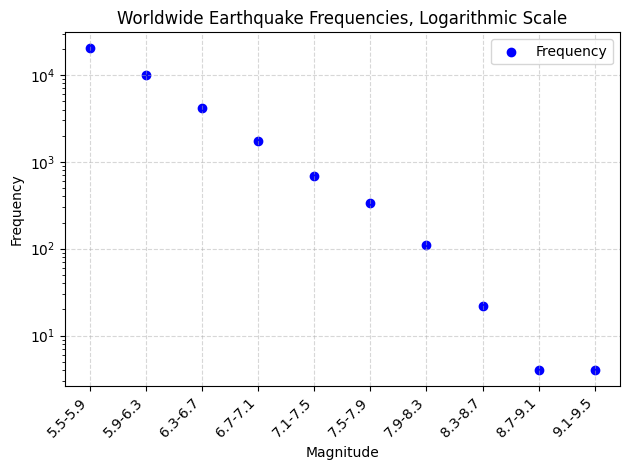

In [25]:
fig, ax = plt.subplots()

# Scatter plot of frequency
ax.scatter(histo.index, histo['Frequency'], color='blue', marker='o', label='Frequency')

# Add logarithmic scale on y-axis
plt.yscale('log')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set ticks and labels on x-axis
plt.xticks(histo.index, histo['Range of Magnitude'], rotation=45, ha='right')

# Set labels and title
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Worldwide Earthquake Frequencies, Logarithmic Scale")

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Now the earthquakes almost a straight line on the graph. This pattern is known as a power-law distribution: it turns out that for every increase of one point in magnitude, an earthquake becomes about ten times less frequent. So, for example, magnitude 6 earthquakes occur ten times more frequently than magnitude 7's, and one hundred times more often than magnitude 8's.

We can use this to relatively calculate the probability that an earthquake will hit a particular region, although it is impossible to know exactly when. For example, if we know that there were 15 earthquakes between 5.0 and 5.9 in a particular region in a period of 70 years, that works to about one earthquake in three years. Following this distribution above, we can "predict" that an earthquake measuring between 6.0 and 6.9 should occur about once every thirty years in this region.

# Is there any correlation between depth of the earthquake and magnitude of the earthquake? 

Earthquakes can occur anywhere between the Earth's surface and about 700 kilometers below the surface. For scientific purposes, an earthquake depth range of 0 - 700 km is divided into three zones: shallow, intermediate, and deep.

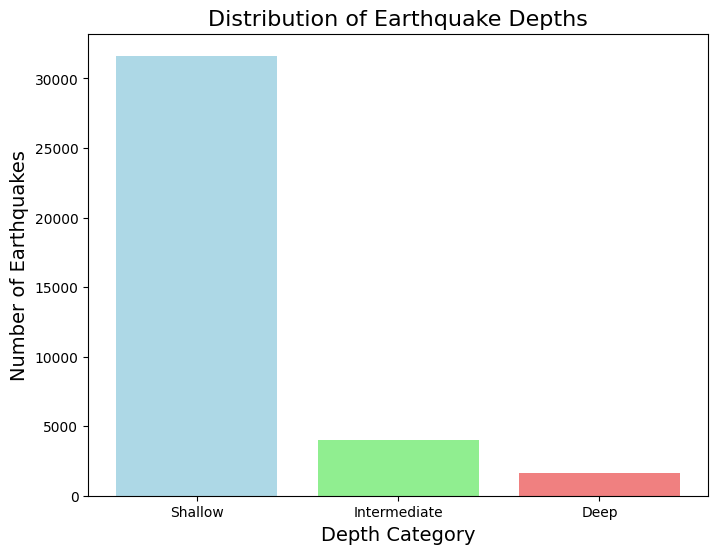

84.7339 percent of significant earthquakes are shallow.
10.7283 percent of significant earthquakes are intermediate.
4.3449 percent of significant earthquakes are deep.


In [26]:
shallow = len(df[df.Depth < 70])  # 18660
intermediate = len(df[(df.Depth > 70) & (df.Depth < 300)])  # 3390
deep = len(df[df.Depth > 300])  # 1326

total = len(df)  # Total number of earthquakes

# Calculate percentages
shallow_percent = round(shallow / total * 100, 4)
intermediate_percent = round(intermediate / total * 100, 4)
deep_percent = round(deep / total * 100, 4)

depth_categories = ['Shallow', 'Intermediate', 'Deep']
depth_counts = [shallow, intermediate, deep]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(depth_categories, depth_counts, color=['lightblue', 'lightgreen', 'lightcoral'])

# Add labels and title
plt.xlabel('Depth Category', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)
plt.title('Distribution of Earthquake Depths', fontsize=16)

# Show plot
plt.show()


# Print percentages
print(str(shallow_percent) + " percent of significant earthquakes are shallow.")
print(str(intermediate_percent) + " percent of significant earthquakes are intermediate.")
print(str(deep_percent) + " percent of significant earthquakes are deep.")


This is very surprising! There was an assumption that deep earthquakes necessarily produce significant ones, but that is not true.

What about the geographical distribution of deep earthquakes? I predict that deep earthquakes are primarily situated in the Ring of Fire.

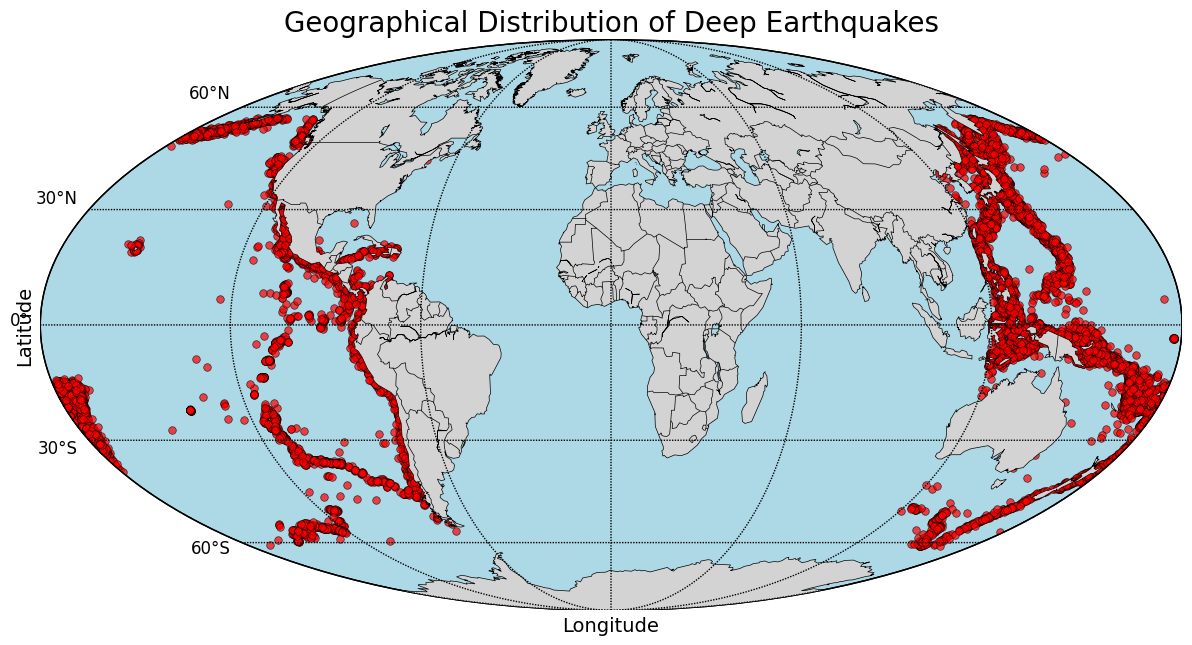

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot of deep earthquakes
m.scatter(x, y, s=30, c='red', alpha=0.7, edgecolor='black', linewidth=0.5)

# Add title and labels
plt.title("Geographical Distribution of Deep Earthquakes", fontsize=20)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

# Add coastlines, map boundary, countries, and fill continents
m.drawcoastlines(linewidth=0.5)
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Add gridlines
m.drawparallels(range(-90, 91, 30), labels=[1, 0, 0, 0], fontsize=12)
m.drawmeridians(range(-180, 181, 60), labels=[0, 0, 0, 1], fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Deep earthquakes are primarily situated in the Ring of Fire area, with the exception of a few near the Italian Penninsula.

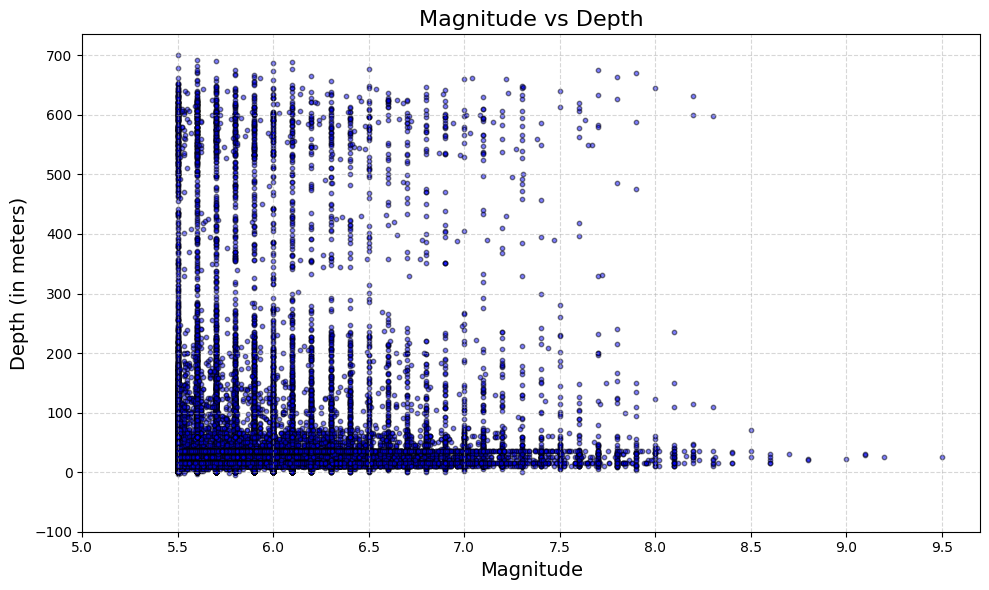

In [28]:
import matplotlib.pyplot as plt

# Plot the scatter plot of magnitude vs depth
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df["Mag"], df["Depth"], s=10, c='blue', alpha=0.5, edgecolors='black')

# Add title and labels
plt.title("Magnitude vs Depth", fontsize=16)
plt.xlabel("Magnitude", fontsize=14)
plt.ylabel("Depth (in meters)", fontsize=14)

# Set limits for better visualization
plt.xlim(left=5.0)
plt.ylim(bottom=-100)
plt.xticks(np.arange(5.0, max(df["Mag"]) + 0.5, 0.5))

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

This plot tells me that earthquakes with magnitudes 5.5 to roughly 6.5 can be found in a great range of depths, from 0 meters to 700 meters. However, the depth of larger earthquakes are bimodal - they originate from the surface or from deep underground.o.

In [42]:
# Correlation coefficient between Magnitude and Depth
np.corrcoef(df["Mag"], df["Depth"])


array([[ 1.        , -0.00470605],
       [-0.00470605,  1.        ]])

A negative correlation coefficient indicates an inverse relationship between magnitude and depth. In other words, as the magnitude of earthquakes increases, the depth at which they occur tends to decrease, and vice versa. This finding is common in seismology, where larger earthquakes often occur at shallower depths.

## Time correlations

### Do some earthquakes occur more in some months than others?
### Do some years have more earthquakes than others?

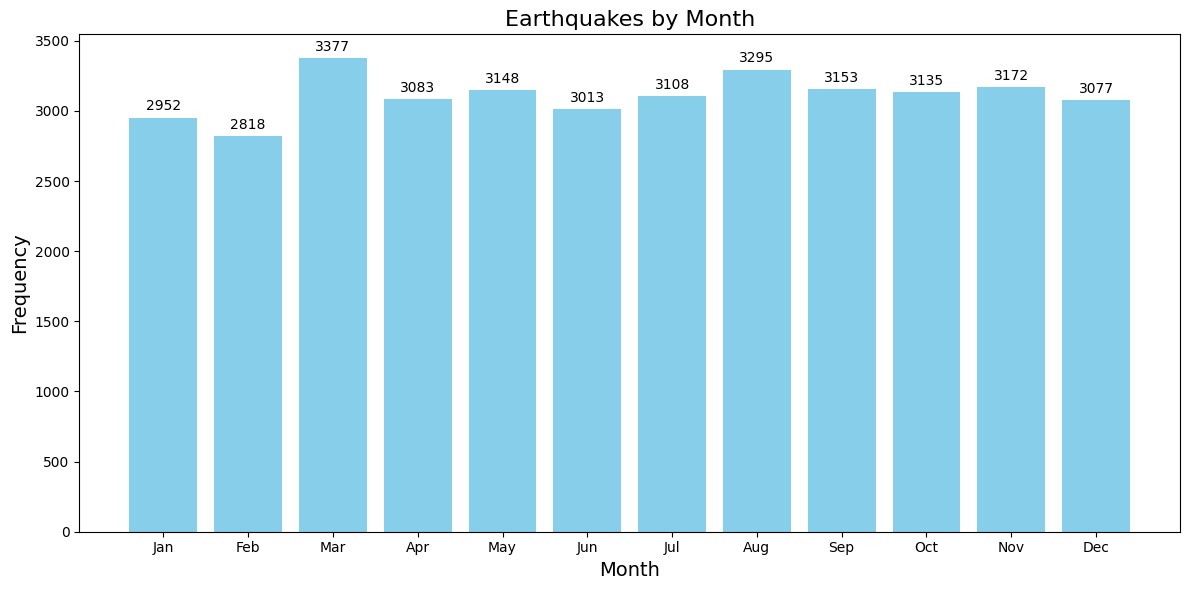

In [30]:
# Convert 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Extract month and year from the 'Date' column
df["Month"] = df['Date'].dt.month
df["Year"] = df['Date'].dt.year

# Group earthquakes by month and year
freqbymonth = df.groupby('Month').size()
freqbyyear = df.groupby('Year').size()

# Plot earthquakes by month
fig, ax = plt.subplots(figsize=(12, 6))
bar_positions = np.arange(12)
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

bars = ax.bar(bar_positions, freqbymonth, color='skyblue')

# Add labels and title
plt.xlabel('Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Earthquakes by Month', fontsize=16)

# Add data labels above bars
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Set x-axis tick labels
plt.xticks(bar_positions, months)

# Show plot
plt.tight_layout()
plt.show()


It seems that there is a uniform distribution of earthquake frequency along all 12 months.

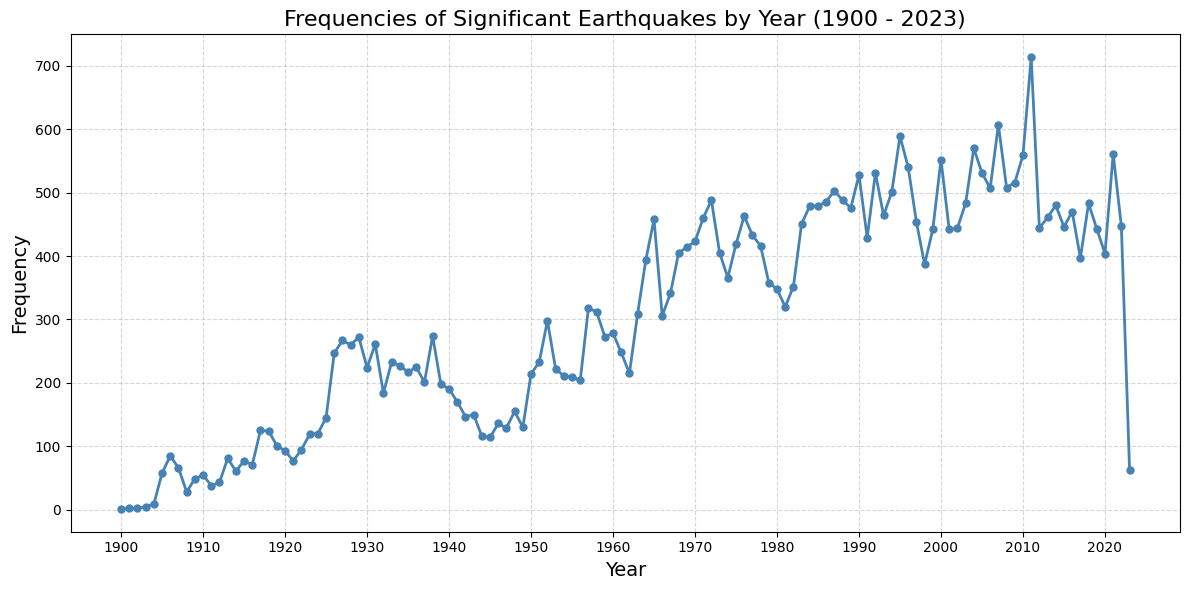

In [31]:
plt.figure(figsize=(12, 6))
yearly_line = plt.plot(freqbyyear.index, freqbyyear.values, color='steelblue', marker='o', markersize=5, linewidth=2)

# Add labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequencies of Significant Earthquakes by Year (1900 - 2023)', fontsize=16)

# Set x-axis ticks every 10 years for better readability
plt.xticks(range(1900, 2024, 10))

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()

It suggests an upward trend in the frequency of significant earthquakes over the years from 1900 to 2023. This upward trend indicates that, on average, there has been an increase in the occurrence of significant earthquakes during this time period.

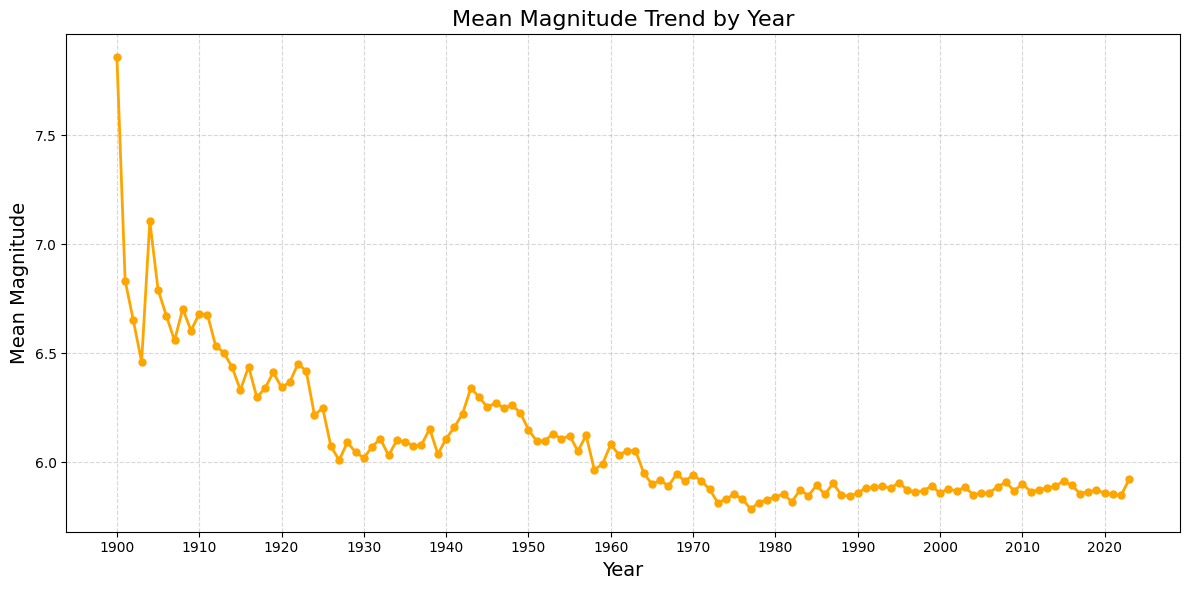

In [32]:
# Calculate the mean magnitude for each year
mean_magnitude_by_year = df.groupby('Year')['Mag'].mean()

# Plot the trend of earthquake magnitudes by year
plt.figure(figsize=(12, 6))
plt.plot(mean_magnitude_by_year.index, mean_magnitude_by_year.values, color='orange', marker='o', markersize=5, linewidth=2)

# Add labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Magnitude', fontsize=14)
plt.title('Mean Magnitude Trend by Year', fontsize=16)

# Set x-axis ticks every 10 years for better readability
plt.xticks(range(1900, 2024, 10))

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


It suggests a downward trend in the mean magnitudes of earthquakes over the years from 1900 to 2023. This downward trend indicates that, on average, the magnitude of earthquakes has decreased over this time period.

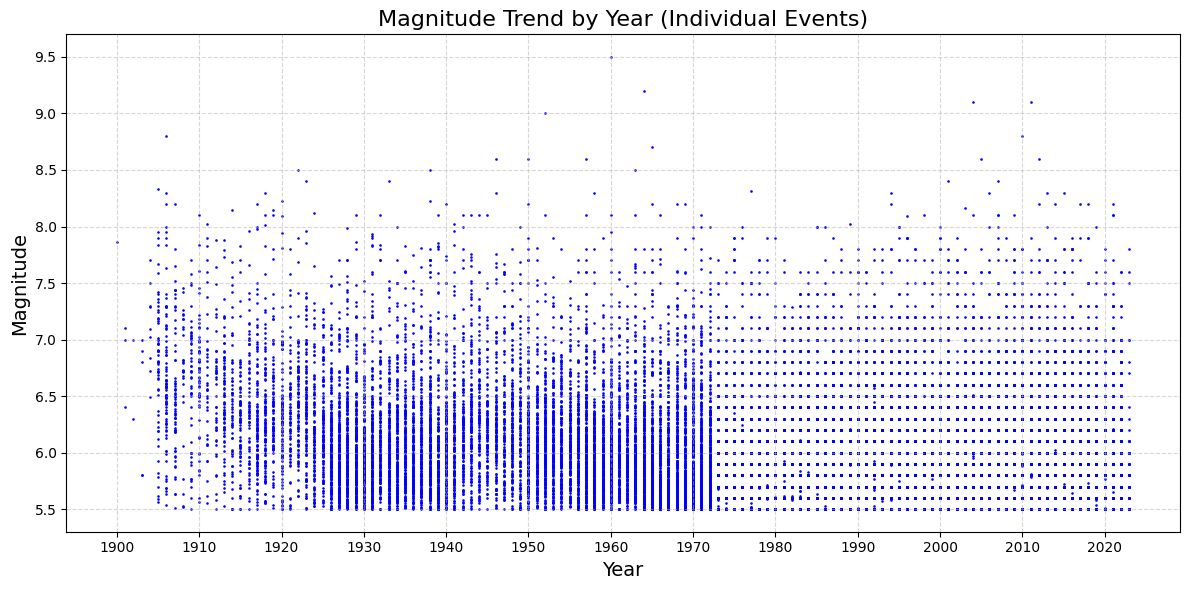

In [33]:
# Plot the trend of earthquake magnitudes by year for every value
plt.figure(figsize=(12, 6))

# Scatter plot for each earthquake event
plt.scatter(df["Year"], df["Mag"], color='blue', alpha=1, s=3, marker='.')

# Add labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.title('Magnitude Trend by Year (Individual Events)', fontsize=16)

# Set x-axis ticks every 10 years for better readability
plt.xticks(range(1900, 2024, 10))

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


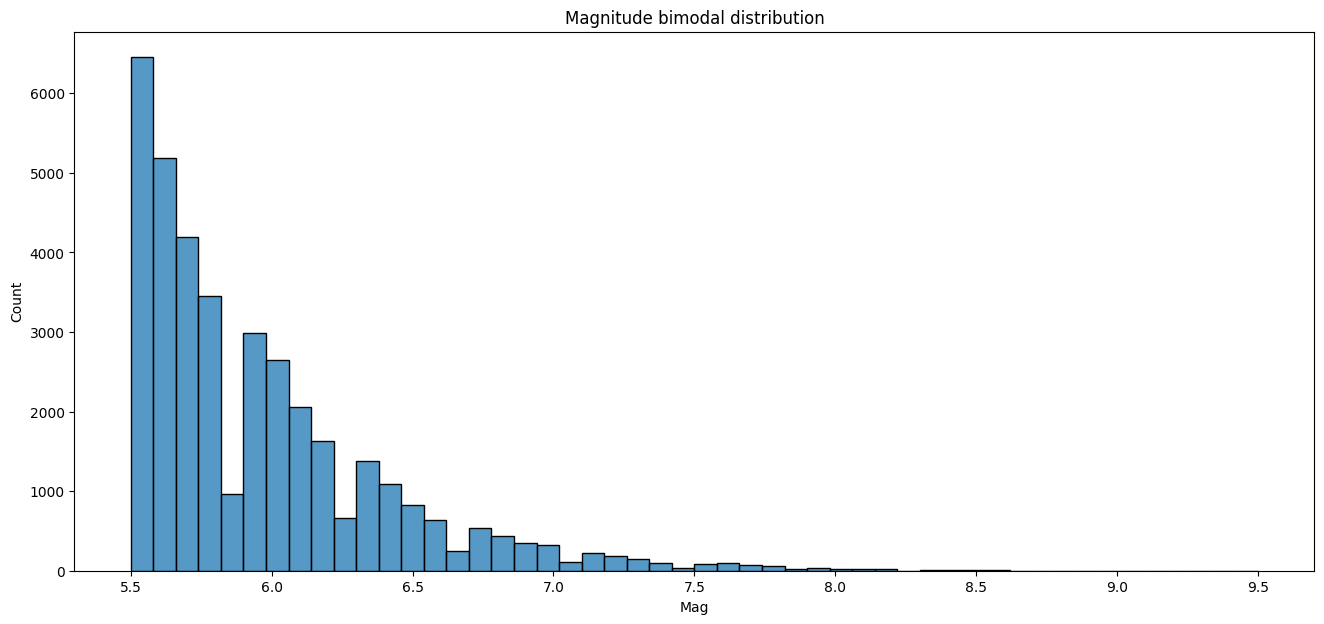

In [34]:
plt.figure(figsize = (16,7))
sns.histplot(df["Mag"], bins = 50)
plt.title("Magnitude bimodal distribution")
plt.show()

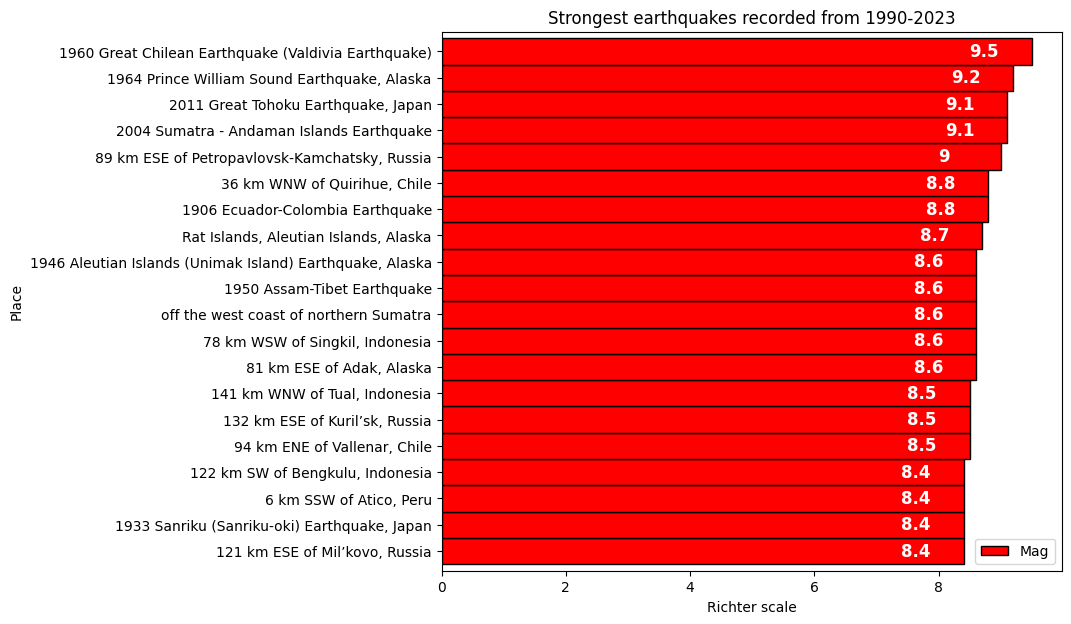

In [35]:
top_mag = df.sort_values(by="Mag", ascending = False).head(20)

plot = top_mag.sort_values(by="Mag").plot(x="Place",y="Mag", kind ="barh",width=1, edgecolor="black",figsize =(8,7),color = "red")
for bars in plot.containers:
        plot.bar_label(bars, padding=-45, fontsize=12, color="white", weight="bold")
plt.title("Strongest earthquakes recorded from 1990-2023")
plt.xlabel("Richter scale")
plt.show()

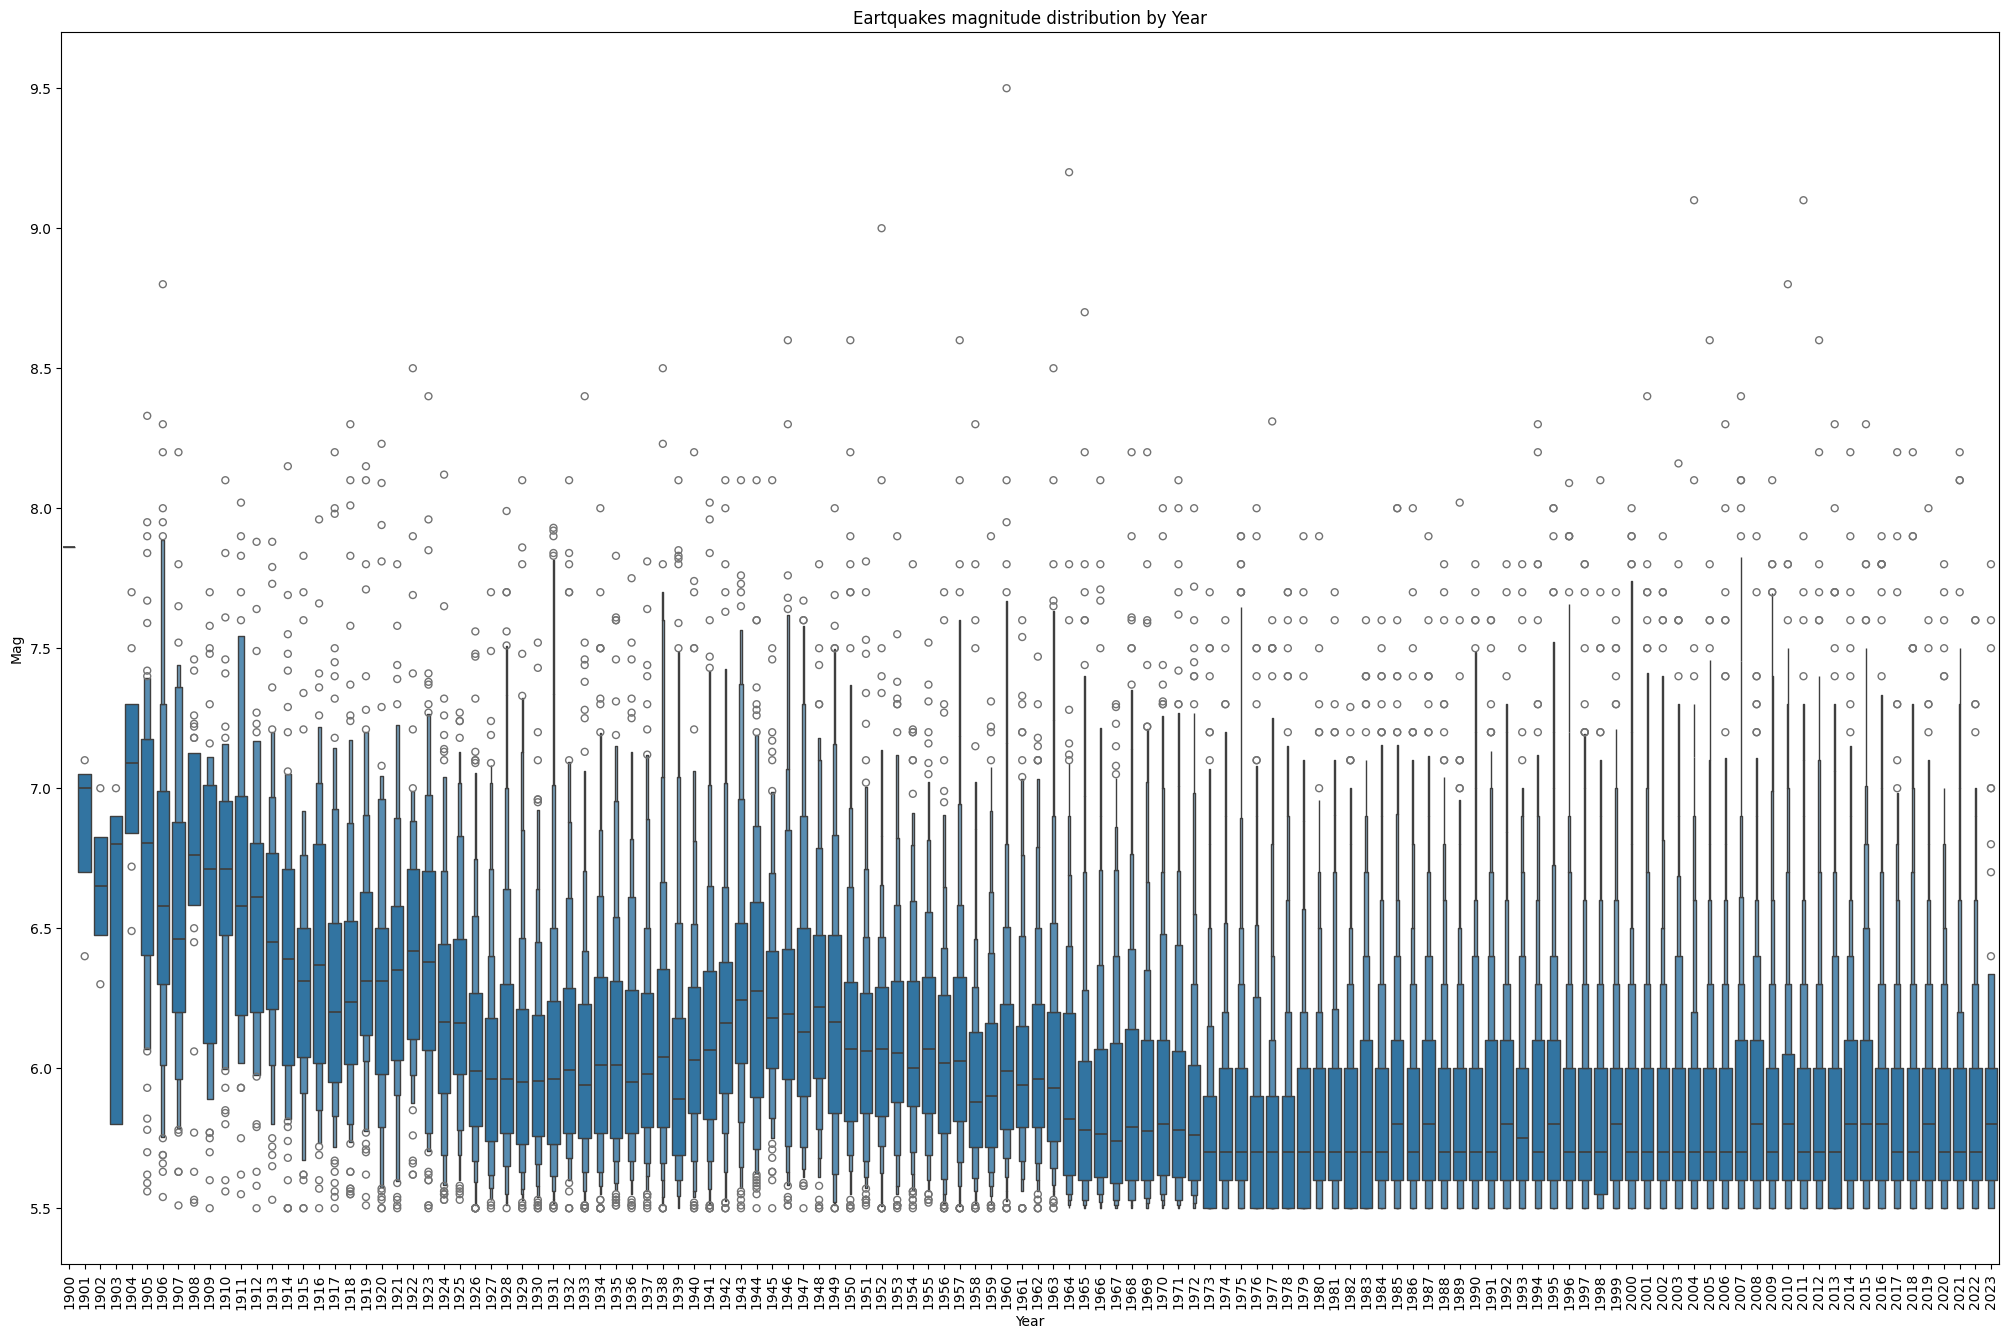

In [36]:
plt.figure(figsize=(25,16))
sns.boxenplot(df,x="Year", y="Mag",linewidth=1 )
plt.xticks(rotation=90)
plt.title("Eartquakes magnitude distribution by Year")
plt.show()

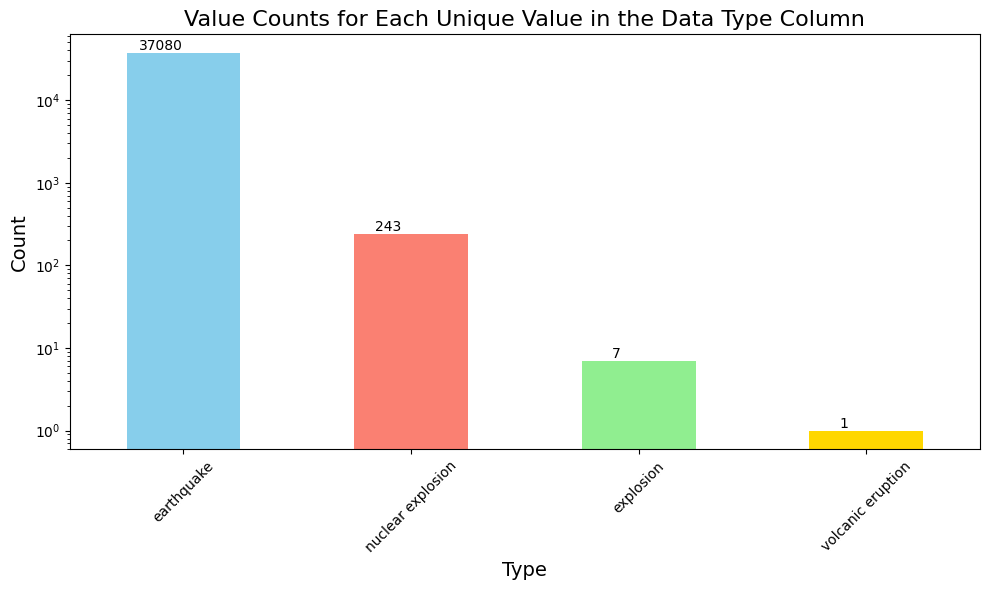

In [37]:
# Use value_counts to count the occurrences of each unique value in the 'Type' column
value_counts = df['Type'].value_counts()

# Define a color palette with four distinct colors
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']

# Plotting the value counts with custom colors and logarithmic scale
plt.figure(figsize=(10, 6))
bars = value_counts.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Value Counts for Each Unique Value in the Data Type Column', fontsize=16)

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Annotate bars with exact count values
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, 
             bar.get_height(), 
             f'{int(bar.get_height())}', 
             ha='center', 
             va='bottom')

# Show plot
plt.tight_layout()
plt.show()

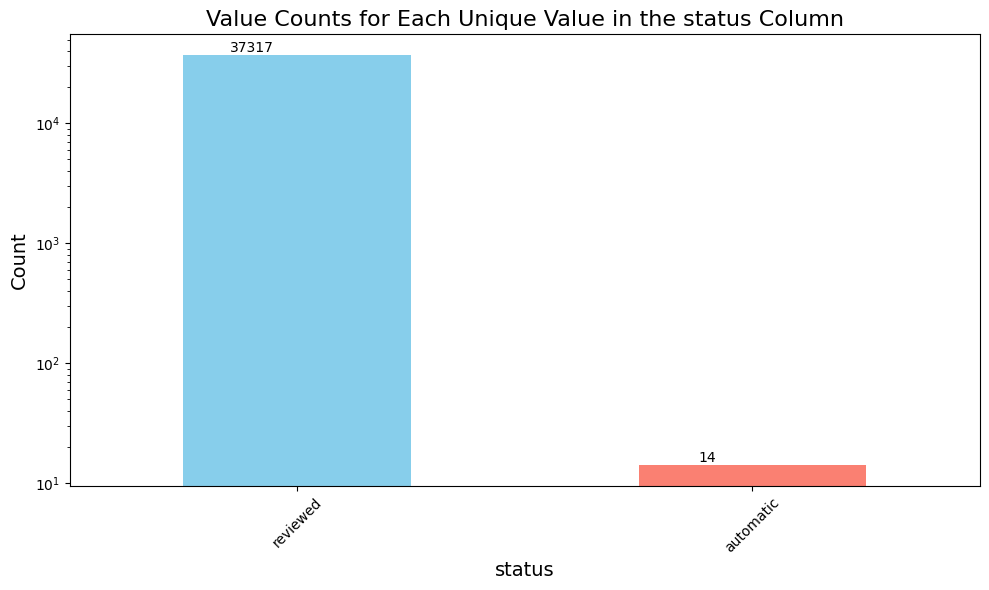

In [38]:
# Use value_counts to count the occurrences of each unique value in the 'status' column
value_counts = df['status'].value_counts()

# Define a color palette with four distinct colors
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']

# Plotting the value counts with custom colors and logarithmic scale
plt.figure(figsize=(10, 6))
bars = value_counts.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Value Counts for Each Unique Value in the status Column', fontsize=16)

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Annotate bars with exact count values
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, 
             bar.get_height(), 
             f'{int(bar.get_height())}', 
             ha='center', 
             va='bottom')

# Show plot
plt.tight_layout()
plt.show()

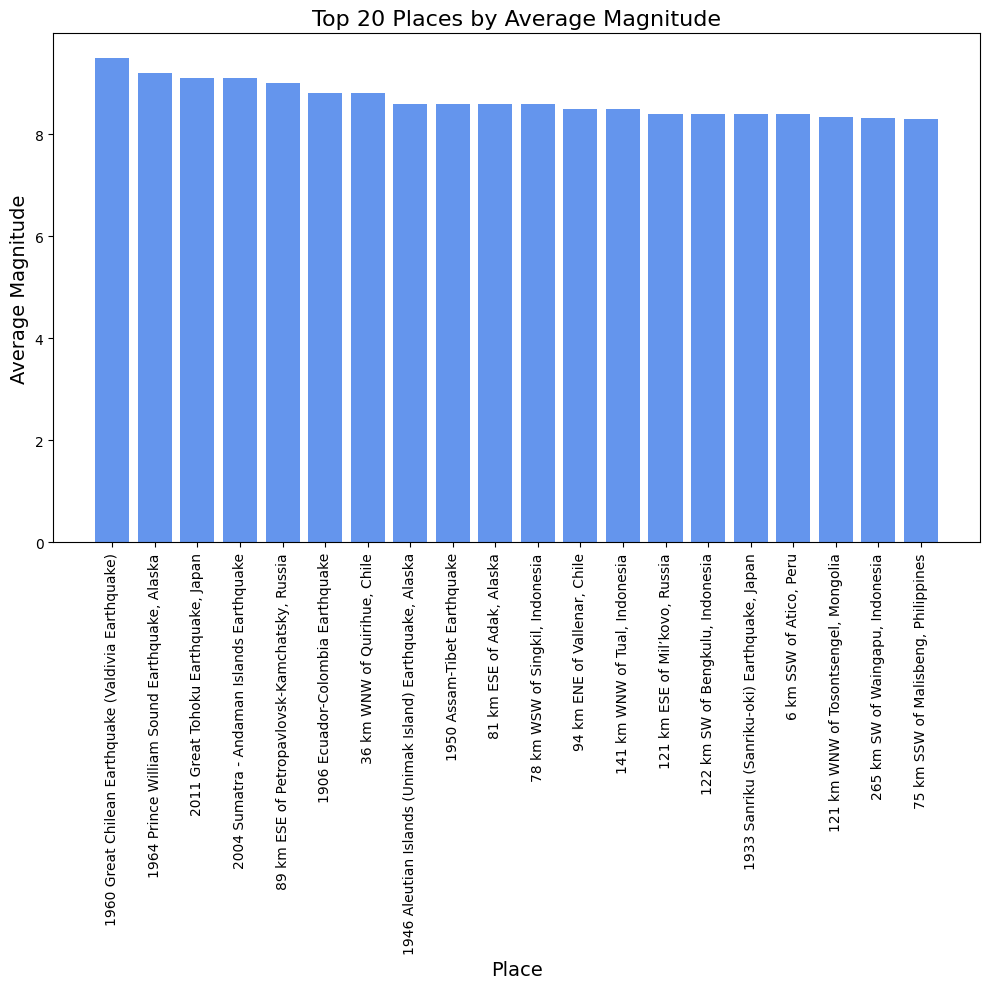

In [39]:
# Calculate the average magnitude for each place and sort in descending order
average_magnitude = df.groupby('Place')['Mag'].mean().reset_index()
average_magnitude = average_magnitude.sort_values(by='Mag', ascending=False)

# Select the top 20 places with the highest average magnitude
top_20_magnitude = average_magnitude.head(20)

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 10))
plt.bar(top_20_magnitude['Place'], top_20_magnitude['Mag'], color='#6495ED')

# Adding labels and title
plt.xlabel('Place', fontsize=14)
plt.ylabel('Average Magnitude', fontsize=14)
plt.title('Top 20 Places by Average Magnitude', fontsize=16)

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()